### Теория вероятностей и математическая статистика
##### Домашнее задание к уроку 5

<b>Задача 1</b>
<br>
<br>
Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надежностью 0,95 (доверительная информация), если выборочное среднее равно 80, а объем равен 256.

Для начала: надежность 0,95 означает, что $\alpha=0.05$. Нам известно СКО, поэтому будем использовать Z-статистику для нахождения доверительного интервала.

In [1]:
from scipy import stats
import math as m
import numpy as np
from matplotlib import pyplot as plt

n = 256
p = 0.95
alpha = 1 - p
average_x = 80
sigma = 16

t1 = stats.norm.ppf(alpha / 2)     #Вычисляем квантили
t2 = stats.norm.ppf(1 - alpha / 2)

left_point = average_x + t1 * sigma / m.sqrt(n)  # Левая и правая границы доверительного интервала
right_point = average_x + t2 * sigma / m.sqrt(n)

print (f'Доверительный интервал: ({left_point:.4f}; {right_point:.4f})')

Доверительный интервал: (78.0400; 81.9600)


<b>Задача 2</b><br>
<br>
Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет: 202, 203, 199, 197, 195, 201, 200, 204, 194, 190. Известно, что их веса распределены нормально. <br>
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%.
2. Найдите P-значение для данного теста.

Пойдем по алгоритму:
1. Нулевая гипотеза: $H_0$ - средний вес пачки печенья составляет 200 г. Языком мат.статистики - математическое ожидание генеральной совокупности равно 200.<br>
Альтернативная гипотеза: $H_1$ - математическое ожидание генеральной совокупности не равно 200.
2. Нам не известно СКО, поэтому будет использовать t-статистику:
$$
t = \frac{\overline{X}-\mu}{\sigma_X/\sqrt{n}}$$
3. Уровень значимости по условию задачи равен $\alpha = 0.01$

In [2]:
cookie_samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
alpha = 0.01
mu = 200

def t_stat(cookie_samples):
    return (cookie_samples.mean() - mu) / (cookie_samples.std(ddof=1) / m.sqrt(cookie_samples.shape[0]))

In [3]:
# Пункт 4. Посчитаем квантили и обозначим критическую область
# В нашем случае критическая область двухсторонняя, так как вес пачки печенья может быть и больше и меньше средней величины. Поэтому alpha
# делим на 2
n = cookie_samples.shape[0]
t1 = stats.t.ppf(alpha / 2, df = n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df = n - 1)
t1, t2

(-3.24983554401537, 3.2498355440153697)

In [4]:
# Пункт 5. Статистический тест
T = t_stat(cookie_samples)
T

-1.0651074037450896

На основании проведенного стат-теста видим, что значение t-статистики не попадает в критическую область, а значит нулевая гипотеза принимается.

In [5]:
p_left = stats.t.cdf(T, df=n - 1)
p_right = 1 - stats.t.cdf(T, df=n - 1)

p_value = 2 * min(p_left, p_right)

p_value

0.31456660352472854

Р-значение больше, чем уровень значимости. Таким образом, нулевая гипотеза принимается.

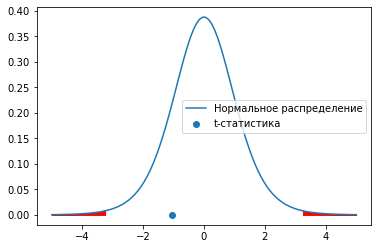

In [6]:
ox1 = np.linspace(-5, 5, 100)
oy1 = stats.t.pdf(ox1, df=n-1)

ox1_left = np.linspace(-5, t1, 50)
oy1_left = stats.t.pdf(ox1_left, df=n-1)

ox1_right = np.linspace(t2, 5, 50)
oy1_right = stats.t.pdf(ox1_right, df=n-1)

plt.plot(ox1, oy1, label='Нормальное распределение')
plt.scatter(T, 0, label='t-статистика')
plt.fill_between(ox1_left, oy1_left, color='r')
plt.fill_between(ox1_right, oy1_right, color='r')
plt.legend()

<b>Задача 3</b>

Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

Проверим гипотезу $H_0$ - математическое ожидание диаметра шариков равно 17 мм.<br>
Альтернативная гипотеза - $H_1$ - математическое ожидание диаметра шариков не равно 17 мм.<br>
Нам известна дисперсия, поэтому будем использовать Z-статистику.
Уровень значимости $\alpha = 0.025$

In [7]:
mu = 17
alpha = 0.025
n = 100
ave_d = 17.5
squared_sigma = 4

# считаем Z-статистику
Z_stat = (ave_d - mu) / (m.sqrt(squared_sigma) / m.sqrt(n))
Z_stat

2.5

In [8]:
# Определяем правостроннюю критическую область
t = stats.norm.ppf(1 - alpha)
t

1.959963984540054

Значение Z попадает в критическую область, значит нулевая гипотеза отвергается.

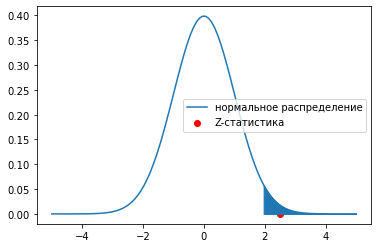

In [9]:
ox3 = np.linspace(-5, 5, 100)
oy3 = stats.norm.pdf(ox3)

ox3_right = np.linspace(t, 5, 30)
oy3_right = stats.norm.pdf(ox3_right)

plt.plot(ox3, oy3, label='нормальное распределение')
plt.scatter(Z_stat, 0, label='Z-статистика', color='r')
plt.fill_between(ox3_right, oy3_right, color='C0')
plt.legend()

<b>Задача 4 (Дополнительно)</b>

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

$H_0$ - дисперсия диаметра шариков равна 0,0625;<br>
$H_1$ - дисперсия диаметра шариков не равна 0,0625;<br>
Будет использоваться статистика:
$$
H = \frac{(n-1)\cdot\sigma^2_X}{\sigma^2_0}$$<br>
Уровень значимости $\alpha = 0.05$

In [18]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134, 1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 
           1.1784, 1.1168, 1.1372, 0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ])

n = samples.shape[0]
variance = 0.0625
sample_variance = samples.var(ddof=1)
alpha = 0.05

# Статистический тест
H = (n - 1) * sample_variance / variance
print(H)

28.720541753333343


In [11]:
# Определяем критическую область
t1 = stats.chi2.ppf((alpha / 2), df=n-1)
t2 = stats.chi2.ppf(1 - alpha / 2, df = n - 1)
t1, t2

(11.688551922452438, 38.0756272503558)

Нулевая гипотеза принимается на уровне значимости 0,05

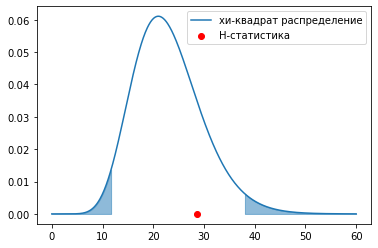

In [21]:
ox4 = np.linspace(0, 60, 600)
oy4 = stats.chi2.pdf(ox4, df=n-1)

ox4_left = np.linspace(0, t1, 200)
oy4_left = stats.chi2.pdf(ox4_left, df=n-1)

ox4_right = np.linspace(t2, 60, 600)
oy4_right = stats.chi2.pdf(ox4_right, df=n-1)

plt.plot(ox4, oy4, label='хи-квадрат распределение')
plt.scatter(H, 0, label='H-статистика', color='r')
plt.fill_between(ox4_left, oy4_left, alpha=0.5, color='C0')
plt.fill_between(ox4_right, oy4_right, alpha=0.5, color='C0')
plt.legend()